In [1]:
import pandas as pd
import datetime 
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
from tensorflow import keras
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model
import datetime
import quandl
import numpy as np

C:\Users\hanif\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime.now()

In [3]:
Stock = { 'Cuntinent': ['America', 'America','Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Europ', 'Europ', 'Europ',
                        'Europ', 'America', 'America', 'America', 'America', 'America', 'Asia', 'Glob--', 'Glob' ,'Europ' ],
         
          'Market':  ['S&P/TSX(Ca)','Nasdaq', 'Nikki','ASX (Aus)', 'Shanghai SE', 'Hang Seng','Taiwan TSEC', 
                     'EURONEXT 100', 'FTSE 100 (fr)', 'DAX(GR)', 'SMI(SW)', 'Dow Jones', 'S&P 500', 
                     'IBOVESPA(Br)', 'S&P/CLX IPSA (Chili)', 'IPC MEXICO', 'Mumbai Sensex', 
                      'Bitcoin(CAD)', 'Brent Crude Oil', 'FTSE(UK)'],
         
        'Symbol': ['^GSPTSE', '^IXIC', '^N225', '^AORD', '000001.SS', '^HSI','^TWII', '^N100', '^FCHI',
                   '^GDAXI', '^SSMI', '^DJI', '^GSPC', '^BVSP', '^IPSA', '^MXX', '^BSESN', 
                   'BTC-CAD', 'BZ=F', 'FTSE']}
index = pd.DataFrame(Stock)
index

,Cuntinent,Market,Symbol
0,America,S&P/TSX(Ca),^GSPTSE
1,America,Nasdaq,^IXIC
2,Asia,Nikki,^N225
3,Asia,ASX (Aus),^AORD
4,Asia,Shanghai SE,000001.SS
5,Asia,Hang Seng,^HSI
6,Asia,Taiwan TSEC,^TWII
7,Europ,EURONEXT 100,^N100
8,Europ,FTSE 100 (fr),^FCHI
9,Europ,DAX(GR),^GDAXI


In [4]:
Glob = index[index['Cuntinent']=='Glob']
Amer = index[index['Cuntinent']=='America']
Ca = index[index['Market']=='S&P/TSX(Ca)']
Amer = Amer.append(Glob, sort=True)

In [5]:
Asia = index[index['Cuntinent']=='Asia']
Asia = Asia.append(Glob, sort=True)
Asia = Asia.append(Ca, sort=True)

In [6]:
Euro = index[index['Cuntinent']=='Europ']
Euro = Euro.append(Glob, sort=True)
Euro = Euro.append(Ca, sort=True)

# Europ - Canada

In [7]:
Euro_sym = Amer['Symbol'].tolist()


Euro_adj = web.DataReader(Euro['Symbol'].tolist() , 'yahoo', start=start, end=end)['Adj Close']
# Amer_adj

reset_Euro_adj = Euro_adj.pct_change()  #Percentage change between the current and a prior element.

corr_Euro_adj = reset_Euro_adj.corr()
corr_Euro_adj

C:\Users\hanif\Anaconda3\lib\site-packages\pandas_datareader\base.py:270: SymbolWarning: Failed to read symbol: 'FTSE', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols,^N100,^FCHI,^GDAXI,^SSMI,BZ=F,^GSPTSE,FTSE
Symbols,,,,,,,
^N100,1.000000,0.997046,0.974879,0.881765,0.143886,0.848993,NaN
^FCHI,0.997046,1.000000,0.972250,0.868178,0.132919,0.847148,NaN
^GDAXI,0.974879,0.972250,1.000000,0.857017,0.136974,0.834298,NaN
^SSMI,0.881765,0.868178,0.857017,1.000000,0.134060,0.816117,NaN
BZ=F,0.143886,0.132919,0.136974,0.134060,1.000000,0.169361,NaN
^GSPTSE,0.848993,0.847148,0.834298,0.816117,0.169361,1.000000,NaN
FTSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


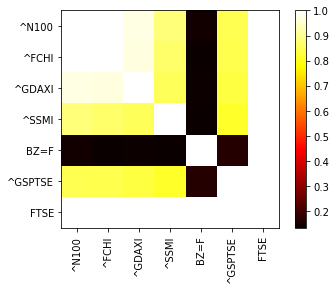

In [8]:
plt.imshow(corr_Euro_adj, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_Euro_adj)), corr_Euro_adj.columns)
plt.yticks(range(len(corr_Euro_adj)), corr_Euro_adj.columns)
plt.xticks(rotation=90);

# America

In [9]:
amer_sym = Amer['Symbol'].tolist()


Amer_adj = web.DataReader(Amer['Symbol'].tolist() , 'yahoo', start=start, end=end)['Adj Close']
# Amer_adj

reset_Amer_adj = Amer_adj.pct_change()  #Percentage change between the current and a prior element.

corr_Amer_adj = reset_Amer_adj.corr()
corr_Amer_adj

C:\Users\hanif\Anaconda3\lib\site-packages\pandas_datareader\base.py:270: SymbolWarning: Failed to read symbol: '^IPSA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols,^GSPTSE,^IXIC,^DJI,^GSPC,^BVSP,^MXX,BZ=F,^IPSA
Symbols,,,,,,,,
^GSPTSE,1.000000,0.873480,0.915671,0.903617,0.886153,0.784530,0.169361,NaN
^IXIC,0.873480,1.000000,0.968845,0.982940,0.843101,0.661162,0.204614,NaN
^DJI,0.915671,0.968845,1.000000,0.993893,0.873564,0.714783,0.176711,NaN
^GSPC,0.903617,0.982940,0.993893,1.000000,0.865957,0.703189,0.183909,NaN
^BVSP,0.886153,0.843101,0.873564,0.865957,1.000000,0.732429,0.121659,NaN
^MXX,0.784530,0.661162,0.714783,0.703189,0.732429,1.000000,0.126693,NaN
BZ=F,0.169361,0.204614,0.176711,0.183909,0.121659,0.126693,1.000000,NaN
^IPSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

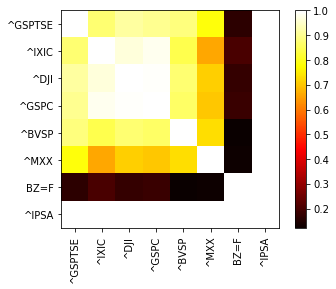

In [10]:
plt.imshow(corr_Amer_adj, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_Amer_adj)),  corr_Amer_adj.columns)
plt.yticks(range(len(corr_Amer_adj)),  corr_Amer_adj.columns);
plt.xticks(rotation=90)

# the order of name is not correct, i should fix it

# Asia-Canada

In [11]:
asia_sym = Asia['Symbol'].tolist()


asia_adj = web.DataReader(Asia['Symbol'].tolist() , 'yahoo', start=start, end=end)['Adj Close']
# Amer_adj

reset_asia_adj = asia_adj.pct_change()  #Percentage change between the current and a prior element.

corr_asia_adj = reset_asia_adj.corr()
corr_asia_adj

Symbols,^N225,^AORD,000001.SS,^HSI,^TWII,^BSESN,BZ=F,^GSPTSE
Symbols,,,,,,,,
^N225,1.000000,0.264865,0.477857,0.595230,0.564204,0.344418,0.062401,0.410303
^AORD,0.264865,1.000000,-0.043123,0.009936,0.058244,-0.063802,0.173652,0.031367
000001.SS,0.477857,-0.043123,1.000000,0.612966,0.493868,0.547416,0.167566,0.389707
^HSI,0.595230,0.009936,0.612966,1.000000,0.771428,0.733461,0.047090,0.570685
^TWII,0.564204,0.058244,0.493868,0.771428,1.000000,0.663148,0.074257,0.395882
^BSESN,0.344418,-0.063802,0.547416,0.733461,0.663148,1.000000,0.062287,0.585891
BZ=F,0.062401,0.173652,0.167566,0.047090,0.074257,0.062287,1.000000,0.169463
^GSPTSE,0.410303,0.031367,0.389707,0.570685,0.395882,0.585891,0.169463,1.000000


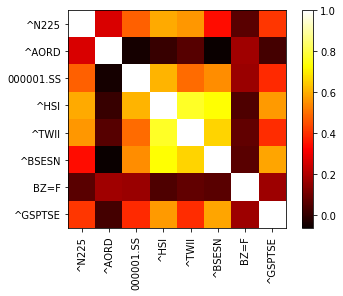

In [12]:
plt.imshow(corr_asia_adj, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_asia_adj)), corr_asia_adj.columns)
plt.yticks(range(len(corr_asia_adj)), corr_asia_adj.columns)
plt.xticks(rotation=90);

In [13]:
Tsx = web.DataReader('^GSPTSE', 'yahoo', start , end)
Tsx_adj = Tsx[['Adj Close']]
Tsx_adj_np = Tsx_adj.to_numpy()
Tsx_adj_np.resize(len(Tsx_adj))
# Tsx_adj_np[-100:]

In [14]:

for i in range(len(index)-2):
    try:
        df = web.DataReader(index.loc[i, 'Symbol'], 'yahoo', start , end)
        df_adj = df[['Adj Close']]
        df_adj_np = df_adj.to_numpy()
        df_adj_np.resize(len(df_adj))
        df_adj_np[:-100]
        Corr = np.corrcoef(Tsx_adj_np[-100:],df_adj_np[-100:])[0,1]
        print('TSX and ',index.loc[i, 'Market'], 'Corrolation is: ', Corr)
    except RemoteDataError:
        pass

TSX and  S&P/TSX(Ca) Corrolation is:  1.0


NameError: name 'RemoteDataError' is not defined

# Oil and other stock market

In [ ]:
# oil = web.DataReader('BZ=F', 'yahoo', start , end)
# oil_adj = oil[['Adj Close']]
# oil_adj_np = oil_adj.to_numpy()
# oil_adj_np.resize(len(oil_adj))
# oil_adj_np[-100:].ndim

In [ ]:
# l = oil_adj_np[:len(oil)-100]

# for i in range(len(index)-1):
#     df = web.DataReader(index.loc[i, 'Symbol'], 'yahoo', start , end)
#     df_adj = df[['Adj Close']]
#     df_adj_np = df_adj.to_numpy()
#     df_adj_np.resize(len(df_adj))
#     df_adj_np[:-100]
#     Corr = np.corrcoef(l, df_adj_np[-100:])[0,1]
# #         print('Oil and ',index.loc[i, 'Market'], 'Corrolation is: ', Corr)
#     print(df_adj_np[:-100])
    

In [ ]:
Bit = web.DataReader('BTC-CAD', 'yahoo', start , end)
Bit_adj = Bit[['Adj Close']]
Bit_adj_np = Bit_adj.to_numpy()
Bit_adj_np.resize(len(Bit_adj))

In [ ]:
# for i in range(len(index)-1):
#     try:
#         df = web.DataReader(index.loc[i, 'Symbol'], 'yahoo', start , end)
#         df_adj = df[['Adj Close']]
#         df_adj_np = df_adj.to_numpy()
#         df_adj_np.resize(len(df_adj))
#         df_adj_np[:-100]
#         l = oil_adj_np[:len(oil)-100]
# #         Corr = np.corrcoef(oil_adj_np[:len(oil)-100], df_adj_np[-100:])[0,1]
#         print('Bit Coin and ',index.loc[i, 'Market'], 'Corrolation is: ', Corr)
#     except RemoteDataError:
#         pass

In [ ]:
dfcomp2 = web.DataReader(['^GSPTSE', '^IXIC', '^N225', '^AORD', '000001.SS', '^HSI','^TWII', '^N100', '^FCHI', '^GDAXI', '^SSMI', '^DJI', 
                   '^GSPC', '^BVSP', '^IPSA', '^MXX', '^BSESN', 'BZ=F', 'JAPSY', 'AC.TO'], 'yahoo', start=start, end=end)['Adj Close']

In [ ]:
from pandas import plotting
plotting.scatter_matrix(dfcomp2, diagonal='kde', figsize=(10, 10));

In [ ]:
retscomp2 = dfcomp2.pct_change()
corr2 = retscomp2.corr()
corr2

In [ ]:
plt.imshow(corr2, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr2)), corr2.columns)
plt.yticks(range(len(corr2)), corr2.columns);

In [ ]:
df = web.DataReader('BTC-CAD', 'yahoo', start , end)
df

In [ ]:
# importing pandas module 
import pandas as pd 

# importing regex module 
import re 
	
# making data frame 
data = pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/nba.csv") 
	
# removing null values to avoid errors 
data.dropna(inplace = True) 

# storing dtype before operation 
dtype_before = type(data["Salary"]) 

# converting to list 
salary_list = data["Salary"].tolist() 

# storing dtype after operation 
dtype_after = type(salary_list) 

# printing dtype 
print("Data type before converting = {}\nData type after converting = {}".format(dtype_before, dtype_after)) 

# displaying list 
salary_list 
